In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [105]:
#open csv files: phoenix/ ph , orlando/ , houston, atlanta
#two files for each city: 
#daily max temps (tmax, Celsius) and day time relative humidity (rmin, in units of percent).

#assign tmax to variable
ph_tmaxdf = pd.read_csv("tmax_phoenix.csv")
orl_tmaxdf = pd.read_csv("tmax_orlando.csv")
hou_tmaxdf = pd.read_csv("tmax_houston.csv")
atl_tmaxdf = pd.read_csv("tmax_atlanta.csv")

#assign daytime relative humidity file to variable
ph_rhumdf = pd.read_csv("rmin_phoenix.csv")
orl_rhumdf = pd.read_csv("rmin_orlando.csv")
hou_rhumdf = pd.read_csv("rmin_houston.csv")
atl_rhumdf = pd.read_csv("rmin_atlanta.csv")

In [223]:
print(ph_rhumdf)

    Years     1     2     3     4     5     6     7     8     9  ...   357  \
0    1979  16.1  14.2  20.0  26.5  26.0  56.5  50.3  47.2  45.9  ...  27.2   
1    1980  28.9  23.6  15.2  17.6  13.9  14.5  20.7  24.3  53.2  ...  23.7   
2    1981  17.4  18.6  18.5  18.3  18.5  17.5  19.0  32.5  24.2  ...  18.9   
3    1982  42.4  36.7  28.5  28.5  29.4  39.6  26.1  20.9  14.7  ...  43.0   
4    1983  28.4  25.8  27.1  27.5  23.7  23.6  24.9  24.4  20.2  ...  42.4   
5    1984  27.2  26.1  29.0  25.0  24.8  42.2  35.0  34.0  32.9  ...  27.9   
6    1985  22.4  17.6  18.4  19.7  22.2  24.7  31.6  46.6  39.5  ...  21.8   
7    1986  30.8  27.9  30.1  31.2  31.6  30.1  15.5  18.1  16.6  ...  35.3   
8    1987  21.0  22.1  14.2  14.3  25.2  36.5  37.3  32.4  26.7  ...  39.8   
9    1988  21.6  23.6  25.0  28.5  35.4  42.0  36.3  33.6  26.5  ...  33.2   
10   1989  24.8  24.2  26.6  26.4  46.5  38.9  20.2  19.7  17.8  ...  10.4   
11   1990  20.8  21.2  34.6  26.5  19.8  17.9  18.7  21.0  20.6 

In [106]:
print(ph_tmaxdf)

    Years      1      2      3      4      5      6      7      8      9  ...  \
0    1979   9.45  10.75  15.35  16.85  14.05  11.15  13.95  14.25  13.35  ...   
1    1980  19.55  18.65  17.45  19.05  19.55  17.85  17.05  13.45  11.15  ...   
2    1981  21.65  21.85  23.55  22.25  23.15  20.55  18.15  19.05  20.05  ...   
3    1982  13.15  11.35  10.35  11.35  12.25  15.15  14.45  18.15  21.25  ...   
4    1983  11.75  13.55  14.55  16.25  20.25  20.45  20.35  20.65  20.85  ...   
5    1984  20.75  18.05  18.55  20.45  15.85  19.35  21.55  20.25  19.45  ...   
6    1985  13.75  11.65  13.45  16.05  18.25  18.05  14.25  12.45  13.35  ...   
7    1986  20.45  19.85  19.55  18.15  18.55  20.05  16.45  17.75  18.55  ...   
8    1987  18.75  18.15  19.15  16.45  14.85  14.45  14.35  13.75  12.65  ...   
9    1988  14.85  15.85  14.95  17.15  16.15  16.05  15.25  15.35  16.75  ...   
10   1989  13.55  17.65  21.05  14.65  14.15  13.55   9.55   9.85  13.25  ...   
11   1990  16.35  10.15  11.

## Phoenix yearly tmax averages

In [107]:
#pull out yr vector for Phoenix
#same num of yrs for both rhum and tmax

phyrs = np.array(ph_tmaxdf.Years)

#pull out the rest of the data for phoenix
phtmax = np.array(ph_tmaxdf.iloc[:,1:])

#rel hum
phrhum = np.array(ph_rhumdf.iloc[:,1:])

#day of year vector
phdoy = np.arange(1, 366+1) #day one until day 336

print('ph_tmax shape is', ph_tmaxdf.shape)
print('ph_tmax shape is', ph_rhumdf.shape)

ph_tmax shape is (41, 367)
ph_tmax shape is (41, 367)


In [108]:
phtmax

array([[ 9.45, 10.75, 15.35, ..., 15.65, 16.55,   nan],
       [19.55, 18.65, 17.45, ..., 27.45, 23.95, 21.35],
       [21.65, 21.85, 23.55, ..., 17.55, 16.75,   nan],
       ...,
       [13.05,  9.65, 13.05, ..., 24.95, 21.55,   nan],
       [23.35, 24.15, 23.65, ..., 12.45,  6.35,   nan],
       [ 7.65,  9.55, 12.75, ..., 12.55, 15.95,   nan]])

In [109]:
#create a storage variable for our annual mean Tmax values

phtmax_mean_allyrs = np.zeros((phyrs.size)) #storage variable of zeros the size of yrs

for i_phyrs in enumerate(phyrs):
    
    #location of all data
    loc_phyrs = i_phyrs[0] #do it for every yr starting at the 1st
    
    #pull out temp data for the current yr
    phtmax_phyrs = phtmax[loc_phyrs,:]
    
    #calc the mean
    phtmax_mean = np.nanmean(phtmax_phyrs)
    
    #store the current yr estimate in our full array
    phtmax_mean_allyrs[loc_phyrs] = phtmax_mean
    
    
print(phtmax)

[[ 9.45 10.75 15.35 ... 15.65 16.55   nan]
 [19.55 18.65 17.45 ... 27.45 23.95 21.35]
 [21.65 21.85 23.55 ... 17.55 16.75   nan]
 ...
 [13.05  9.65 13.05 ... 24.95 21.55   nan]
 [23.35 24.15 23.65 ... 12.45  6.35   nan]
 [ 7.65  9.55 12.75 ... 12.55 15.95   nan]]


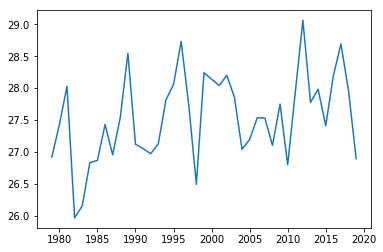

In [110]:
plt.plot(phyrs, phtmax_mean_allyrs)

### Phoenix daily tmax averages annually

(366,)


Text(0.5, 1.0, 'Phoenix Daily Median Maximum Temperature')

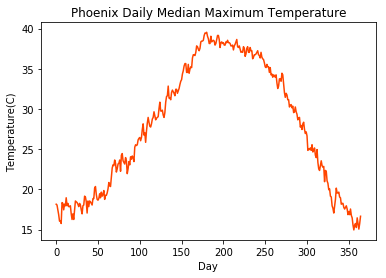

In [111]:
#plt.figure(figsize=(10,5))

phtmax_median = np.median(phtmax,axis=0)

plt.plot(phtmax_median, color= 'orangered')

print((np.median(phtmax,axis=0)).shape)
#plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Phoenix Daily Median Maximum Temperature')


### Phoenix Daily median relative humidity (°C)

Text(0.5, 1.0, 'Phoenix Daily Median Temperature, Relative Humidity')

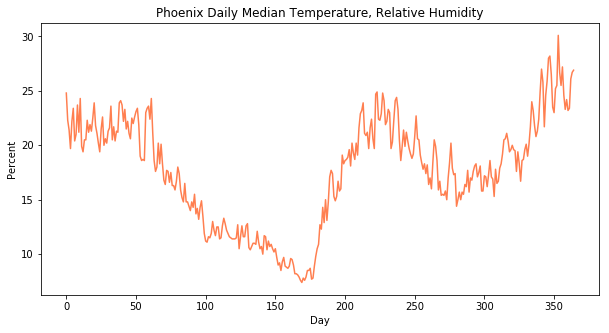

In [112]:
plt.figure(figsize=(10,5))

phrhum_median = np.median(phrhum,axis=0)

plt.plot(phrhum_median, color = 'coral')

#plt.legend()
plt.xlabel('Day')
plt.ylabel('Percent')
plt.title('Phoenix Daily Median Temperature, Relative Humidity')

### Phoenix median tmax and rhum against each other

Text(0.5, 1.0, 'Phoenix Daily Median Maximum Temperature')

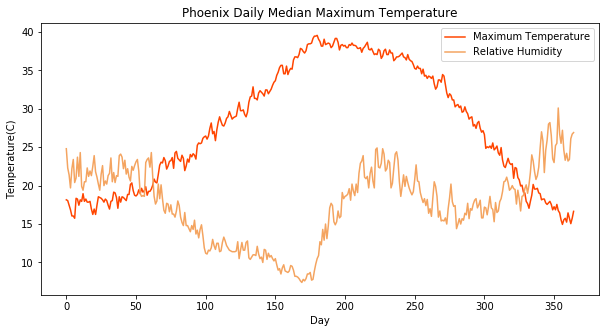

In [113]:
plt.figure(figsize=(10,5))
plt.plot(phtmax_median, color= 'orangered', label= 'Maximum Temperature')
plt.plot(phrhum_median, color = 'sandybrown', label= 'Relative Humidity')

plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Phoenix Daily Median Maximum Temperature')
#plt.plot(phrhum_median, color = 'coral')



## Orlando yearly tmax averages

In [114]:
#pull out yr vector for Orl
#same num of yrs for both rhum and tmax

orlyrs = np.array(orl_tmaxdf.Years)

#pull out the rest of the data for Orl
orltmax = np.array(orl_tmaxdf.iloc[:,1:]) #all of x, all of y skip yrs

#rel hum
orlrhum = np.array(orl_rhumdf.iloc[:,1:])

#day of year vector
orldoy = np.arange(1, 366+1) #day one until day 336



In [115]:
#orltmax.shape
#orlyrs
#print(orl_tmaxdf)

In [116]:
#create a storage variable for our annual mean Tmax values

orltmax_mean_allyrs = np.zeros((orlyrs.size)) #storage variable of zeros the size of yrs

for i_orlyrs in enumerate(orlyrs):
    
    #location of all data
    loc_orlyrs = i_orlyrs[0] #do it for every yr starting at the 1st
    
    #pull out temp data for the current yr
    orltmax_orlyrs = orltmax[loc_orlyrs,:]
    
    
    #calc the mean
    orltmax_mean = np.nanmean(orltmax_orlyrs)
    
    #store the current yr estimate in our full array
    orltmax_mean_allyrs[loc_orlyrs] = orltmax_mean
    

In [117]:
#print(orl_tmax[loc_orlyrs,:])
print(loc_phyrs)

40


### Orlando median tmax temps

(366,)


Text(0.5, 1.0, 'Orlando Daily Median Maximum Temperature')

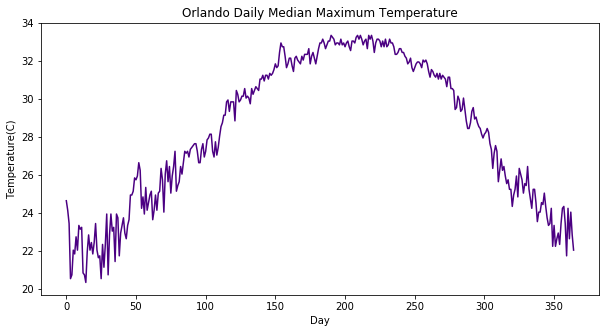

In [118]:
plt.figure(figsize=(10,5))

orltmax_median= np.median(orltmax,axis=0)

plt.plot(orltmax_median, color= 'indigo', label= 'Maximum Temperature')
print((np.median(orltmax,axis=0)).shape)

plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Orlando Daily Median Maximum Temperature')

### Orlando rhum temps

Text(0.5, 1.0, 'Orlando Relative Humidity')

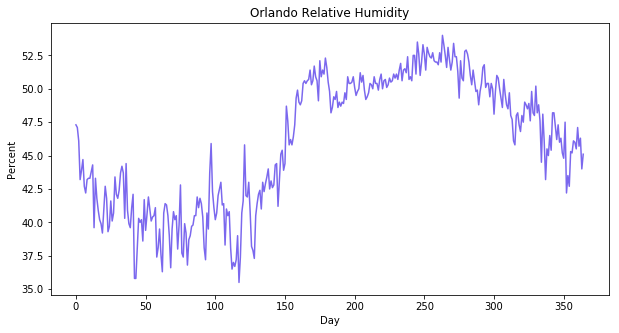

In [119]:
plt.figure(figsize=(10,5))

orlrhum_median = np.median(orlrhum,axis=0)

plt.plot(orlrhum_median, color = 'mediumslateblue', label= 'Relative Humidity')

plt.xlabel('Day')
plt.ylabel('Percent')
plt.title('Orlando Relative Humidity')

#more dangerous, susceptible to heat stress. plot this for every week and clean up code. we will use rhum for orlando 2012 as an example for the for loop

### Orlando tmax and rhum against each other

In [120]:
#plt.figure(figsize=(10,5))
#plt.plot(orltmax_median, color= 'indigo', label= 'Maximum Temperature')
#plt.plot(orlrhum_median, color = 'mediumslateblue', label= 'Relative Humidity')

#plt.legend()
#plt.xlabel('Day')
#plt.ylabel('Temperature(C)')
#plt.title('Orlando Daily Median Maximum Temperature')


## Orlando tmax and rhum for 2012

(array([33]),)


Text(0.5, 1.0, '2012 Orlando Daily Median Maximum Temperature')

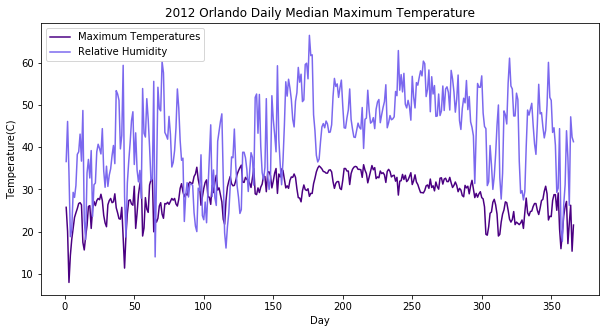

In [121]:
#find loc of 2012 using np.where()

orltmax_loc2012 = np.where(orl_tmaxdf.Years==2012)  #33 is location
#print(orltmax_loc2012)
#print(orltmax[33])

orltmax_2012_2d = np.array(orltmax[33])
#print(orltmax_2012_2d)
#orltmax_2012 = orltmax_2012_2d[:,1:] 

orlrhum_loc2012 = np.where(orl_rhumdf.Years==2012)
print(orlrhum_loc2012)

orlrhum_2012_2d = np.array(orlrhum[33])



plt.figure(figsize=(10,5))
plt.plot(orldoy, orltmax_2012_2d, color= 'indigo', label= 'Maximum Temperatures')
plt.plot(orldoy, orlrhum_2012_2d, color = 'mediumslateblue',label= 'Relative Humidity')

plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('2012 Orlando Daily Median Maximum Temperature')

## Houston yearly tmax averages

In [122]:
#pull out yr vector for Hou
#same num of yrs for both rhum and tmax

houyrs = np.array(hou_tmaxdf.Years)

#pull out the rest of the data for Houston
houtmax = np.array(hou_tmaxdf.iloc[:,1:])

#day of year vector
houdoy = np.arange(1, 366+1) #day one until day 336

#rel hum
hourhum = np.array(hou_rhumdf.iloc[:,1:])

print('ph_tmax shape is', hou_tmaxdf.shape)
print('ph_tmax shape is', hou_rhumdf.shape)

ph_tmax shape is (41, 367)
ph_tmax shape is (41, 367)


In [123]:

#create a storage variable for our annual mean Tmax values

houtmax_mean_allyrs = np.zeros((houyrs.size)) #storage variable of zeros the size of yrs

for i_houyrs in enumerate(houyrs):
    
    #location of all data
    loc_houyrs = i_houyrs[0] #do it for every yr starting at the 1st
    
    #pull out temp data for the current yr
    houtmax_phyrs = houtmax[loc_houyrs,:]
    
    #calc the mean
    houtmax_mean = np.nanmean(houtmax_phyrs)
    
    #store the current yr estimate in our full array
    houtmax_mean_allyrs[loc_houyrs] = houtmax_mean
    
    

### Houston tmax temps

(366,)


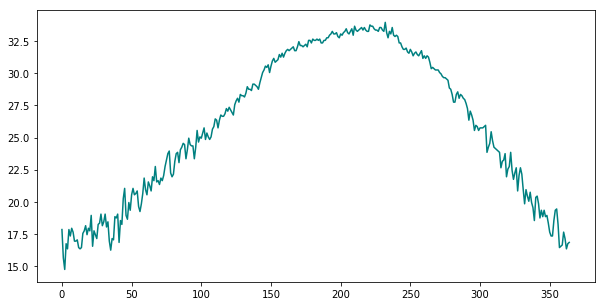

In [124]:
plt.figure(figsize=(10,5))
plt.plot(np.median(houtmax,axis=0), label= 'Maximum Temperature', color='teal')
print((np.median(houtmax,axis=0)).shape)

houtmax_median = np.median(houtmax,axis=0)

### Houston rhum temps

Text(0.5, 1.0, 'Houston Relative Humidity')

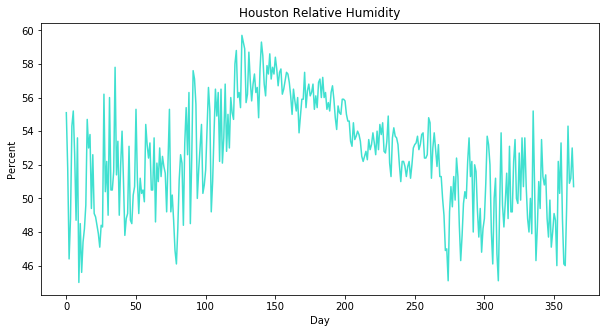

In [125]:
hourhum_median = np.median(hourhum,axis=0)

plt.figure(figsize=(10,5))
plt.plot(hourhum_median, label= 'Relative Humidity', color='turquoise')

#plt.legend()
plt.xlabel('Day')
plt.ylabel('Percent')
plt.title('Houston Relative Humidity')

### Houston tmax and rhum temps against each other

Text(0.5, 1.0, 'Houston Daily Median Maximum Temperature')

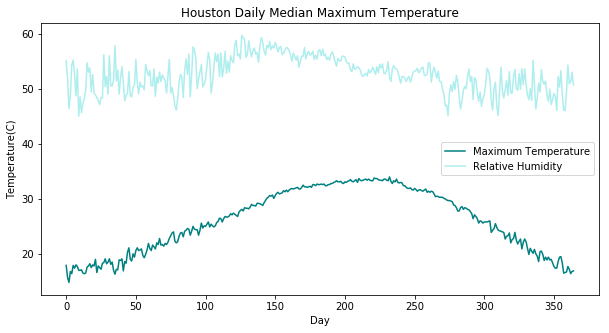

In [126]:
plt.figure(figsize=(10,5))
plt.plot(np.median(houtmax,axis=0), label= 'Maximum Temperature', color='teal')
plt.plot(hourhum_median, label= 'Relative Humidity', color='paleturquoise')

plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Houston Daily Median Maximum Temperature')

## Atlanta yearly tmax averages

In [127]:
#pull out yr vector for Hou
#same num of yrs for both rhum and tmax

atlyrs = np.array(atl_tmaxdf.Years)

#pull out the rest of the data for Houston
atltmax = np.array(atl_tmaxdf.iloc[:,1:])

#day of year vector
atldoy = np.arange(1, 366+1) #day one until day 336

#rel hum
atlrhum = np.array(atl_rhumdf.iloc[:,1:])


In [128]:
#create a storage variable for our annual mean Tmax values

atltmax_mean_allyrs = np.zeros((atlyrs.size)) #storage variable of zeros the size of yrs

for i_atlyrs in enumerate(atlyrs):
    
    #location of all data
    loc_atlyrs = i_houyrs[0] #do it for every yr starting at the 1st
    
    #pull out temp data for the current yr
    atltmax_atlyrs = atltmax[loc_atlyrs,:]
    
    #calc the mean
    atltmax_mean = np.nanmean(atltmax_atlyrs)
    
    #store the current yr estimate in our full array
    atltmax_mean_allyrs[loc_atlyrs] = atltmax_mean
    

### Atlanta tmax median temps

(366,)


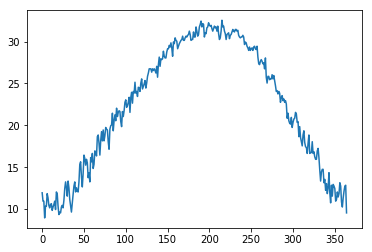

In [129]:
#plt.figure(figsize=(10,5))

atltmax_median= np.median(atltmax,axis=0)
plt.plot(atltmax_median)
print((np.median(atltmax,axis=0)).shape)

### Atlanta rhum 

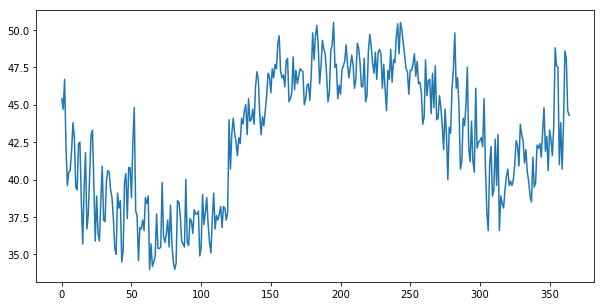

In [130]:
plt.figure(figsize=(10,5))
atlrhum_median = np.median(atlrhum,axis=0)
plt.plot(atlrhum_median)


### Atlanta tmax median and rhum median against each other

Text(0.5, 1.0, 'Atlanta Relative Humidity')

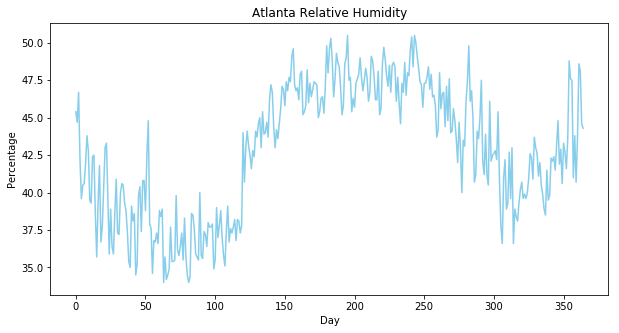

In [131]:
plt.figure(figsize=(10,5))
#plt.plot(atltmax_median, color= 'steelblue', label= 'Maximum Temperature')
plt.plot(atlrhum_median, color = 'skyblue', label= 'Relative Humidity')

#plt.legend()
plt.xlabel('Day')
plt.ylabel('Percentage')
plt.title('Atlanta Relative Humidity')

Text(0.5, 1.0, 'Daily Median Maximum Temperatures')

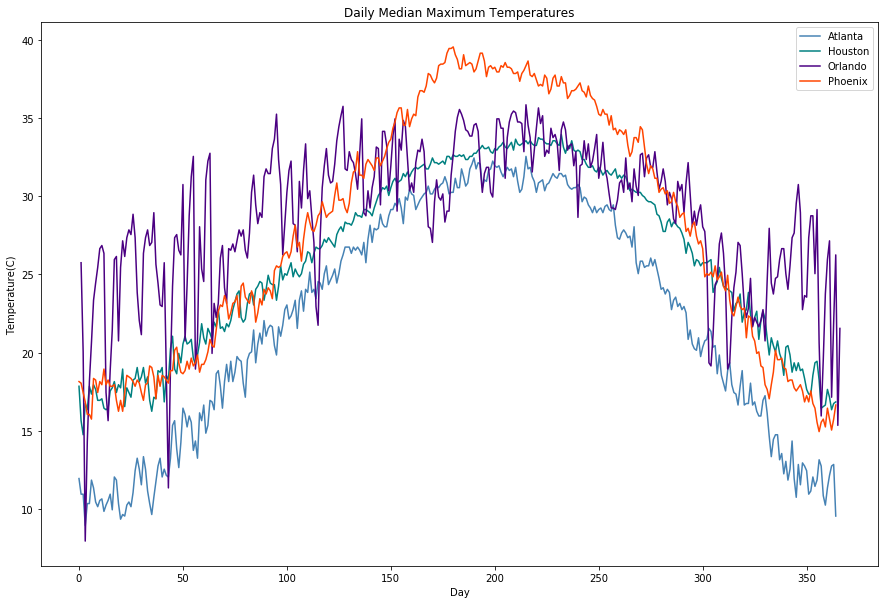

In [132]:
plt.figure(figsize=(15,10))
plt.plot(atltmax_median, color= 'steelblue', label= 'Atlanta')
plt.plot(np.median(houtmax,axis=0), label= 'Houston', color='teal')
plt.plot(orldoy, orltmax_2012_2d, color= 'indigo', label= 'Orlando')
plt.plot(phtmax_median, color= 'orangered', label= 'Phoenix')


plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Daily Median Maximum Temperatures')

In [133]:
# Input data
tdry = 35  # degrees Celsius
RH   = 20  # percent

# Calculate some parameters
Tr = (0.8841*tdry)+0.19
p  = (0.0196*tdry)+0.9031
es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tdry+273.15))   ) )

# Calculate heat index
Thi = Tr + (tdry-Tr)*(  (RH*es)/(100*1.6) )**p

# Print summary
print('Dry Bulb Temp: '+np.str(tdry)+' C')
print('Relative Humidity: '+np.str(RH)+' %')
print('THI feels like Temp: '+np.str(Thi)+' C')

Dry Bulb Temp: 35 C
Relative Humidity: 20 %
THI feels like Temp: 33.4694707635862 C


In [134]:

#CREATE FUNCT TO CALC HEAT INDEX

def heatindex():

    tdry = input("Give dry bulb temperature:")  # degrees Celsius
    RH = input("Give relative humidity")  # percent

# Calculate some parameters
Tr = (0.8841*tdry)+0.19
p  = (0.0196*tdry)+0.9031
es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tdry+273.15))   ) )

# Calculate heat index
Thi = Tr + (tdry-Tr)*(  (RH*es)/(100*1.6) )**p
print("Heat index is: ", Thi)

#atltmax
#atlrhum

Heat index is:  33.4694707635862


In [135]:
#heatindexstorage=np.zeros(phyrs.size)

#for i_phyrs[0] in enumerate(phyrs):
    
    #loc_phyrs_HI = i_phyrs[0] #do for every yr starting from 1st yr
    
    #pull out temp data for the current yr
    #phtmax_phyrs_HI = phtmax[loc_phyrs_HI,:]
    
    #calc heat index
    #phtmax_HI = heatindex()
    
    #store the current yr estimate in our full array
    #heatindexstorage[loc_phyrs] = phtmax_HI
    
def heatindex(tmax,rmin):   #tmax and rhum
        # Calculate some parameters  
        Tr = (0.8841*tmax)+0.19
        p  = (0.0196*tmax)+0.9031   
        es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tmax+273.15))   ) )    
        #Calculate heat index    
        Thi = Tr + (tmax-Tr)*(  (rmin*es)/(100*1.6) )**p    
       
        return Thi
    #Calculate for one set of values
        THI_tmax = heatindex(30,30)
        print("Heat index is: ", THI_tmax)
        # Calculate for a while year
        THI_tmax = heatindex(year_tmax,year_rmin)
        print(THI_tmax)

### this is the hectic plot of every single year's heat index. 

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Heat Index')

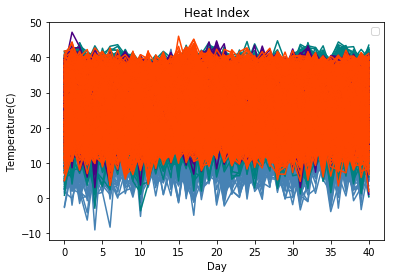

In [136]:
#find median of heat indicies of all tmax temps from every year 

THI_tmax_atl = heatindex(atltmax,atlrhum)
#print(THI_tmax_atl)
THI_tmax_atl_median = np.median(heatindex(atltmax,atlrhum), axis=0)
#print(atltmax.shape, atlrhum.shape)

THI_tmax_orl = heatindex(orltmax, orlrhum)
#print(THI_tmax_orl)
THI_tmax_orl_median = np.median(heatindex(orltmax,orlrhum), axis=0)

THI_tmax_hou = heatindex(houtmax, hourhum)
#print(THI_tmax_hou)
THI_tmax_hou_median = np.median(heatindex(houtmax,hourhum), axis=0)

THI_tmax_ph = heatindex(phtmax, phrhum)
THI_tmax_ph_median = np.median(heatindex(phtmax,phrhum), axis=0)


#plot
#plt.figure(figsize=(15,10))
plt.plot(THI_tmax_atl, color= 'steelblue')
plt.plot((THI_tmax_hou), color='teal')
plt.plot(THI_tmax_orl, color= 'indigo')
plt.plot(THI_tmax_ph, color= 'orangered')


plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Heat Index')


In [137]:
thi_allyrs = heatindex(tmax,rmin)
thi_allyrs.shape
thi_median = np.median(thi_allyrs,axis=0)
plt.plot(thi_median)
plt.plot(np.median(tmax,axis=0),'r--')

NameError: name 'tmax' is not defined

### How about let's not plot every year and do medians only for heat index (thi)

In [138]:
THI_tmax_allyrs_orl

NameError: name 'THI_tmax_allyrs_orl' is not defined

(41, 366)


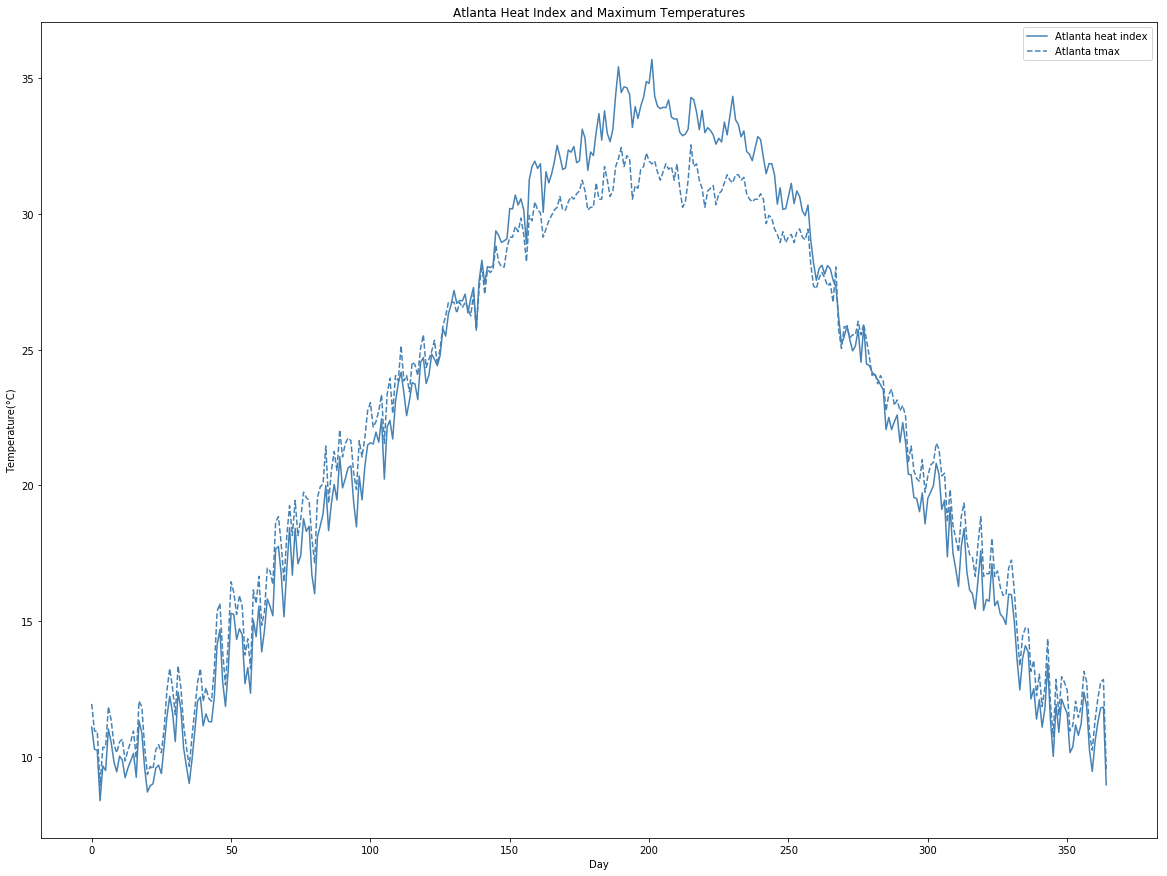

In [209]:
#np.median(thi_allyrs,axis=0)

THI_tmax_atl = heatindex(atltmax,atlrhum)

THI_tmax_atl_median

#print(atltmax.shape, atlrhum.shape)

THI_tmax_orl = heatindex(orltmax, orlrhum)
#print(THI_tmax_orl)

THI_tmax_hou = heatindex(houtmax, hourhum)
#print(THI_tmax_hou)

THI_tmax_ph = heatindex(phtmax, phrhum)

print(THI_tmax_atl.shape)

#plot heat index temperatures
plt.figure(figsize=(20,15))
plt.plot(THI_tmax_atl_median, color= 'steelblue', label= 'Atlanta heat index')
#plt.plot((THI_tmax_hou), label= 'Houston heat index', color='teal')
#plt.plot(orldoy, THI_tmax_orl, color= 'indigo', label= 'Orlando heat index')
#plt.plot(THI_tmax_ph, color= 'orangered', label= 'Phoenix heat index')

#plot rhum temperatures
plt.plot(atltmax_median,'--', color= 'steelblue',label= 'Atlanta tmax')
#plt.plot(np.median(houtmax,axis=0), label= 'Houston tmax', color='aqua')
#plt.plot(orldoy, orltmax_median, color= 'plum', label= 'Orlando tmax')
#plt.plot(phtmax_median, color= 'orange', label= 'Phoenix tmax')


plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(°C)')
plt.title('Atlanta Heat Index and Maximum Temperatures')

plt.savefig('thi_tmax_atl.JPEG',format='jpeg')

(41, 366)

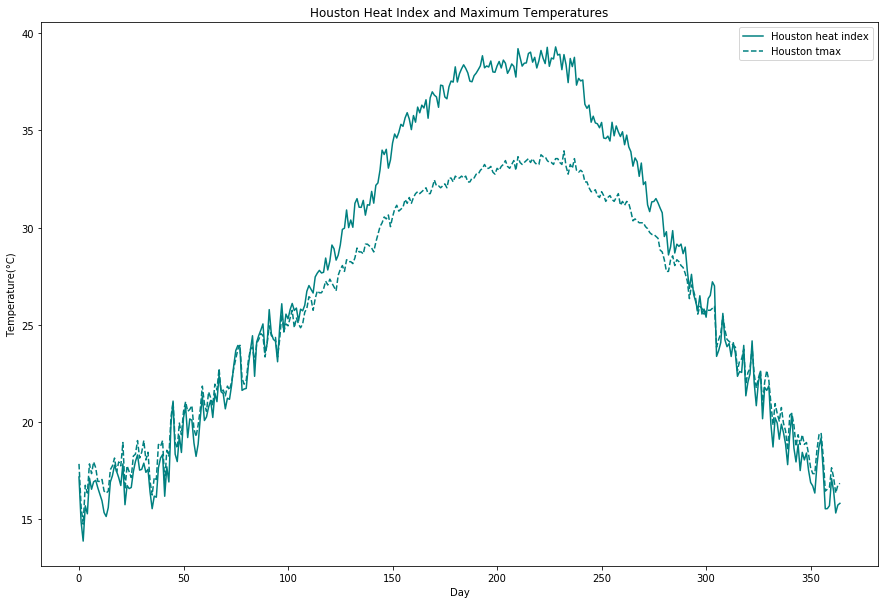

In [140]:
plt.figure(figsize=(15,10))

plt.plot((THI_tmax_hou_median), label='Houston heat index',color='teal')
plt.plot(houtmax_median,'--' , label= 'Houston tmax', color='teal')

plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(°C)')
plt.title('Houston Heat Index and Maximum Temperatures')
plt.savefig('thi_tmax_hou.JPEG',format='jpeg')

THI_tmax_hou.shape


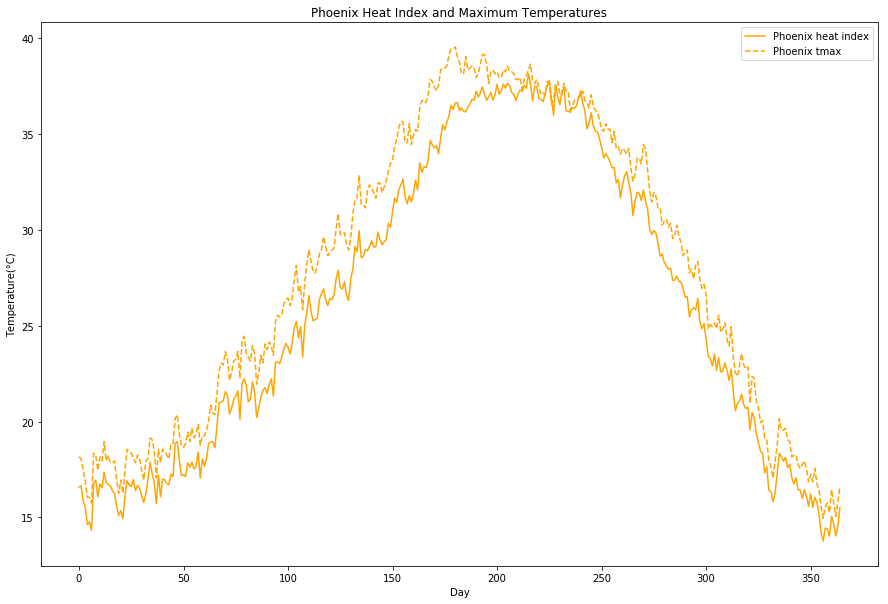

In [141]:
plt.figure(figsize=(15,10))

plt.plot(THI_tmax_ph_median, color= 'orange', label= 'Phoenix heat index')
plt.plot(phtmax_median,'--', color= 'orange', label= 'Phoenix tmax')

plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(°C)')
plt.title('Phoenix Heat Index and Maximum Temperatures')

plt.savefig('thi_tmax_ph.JPEG',format='jpeg')

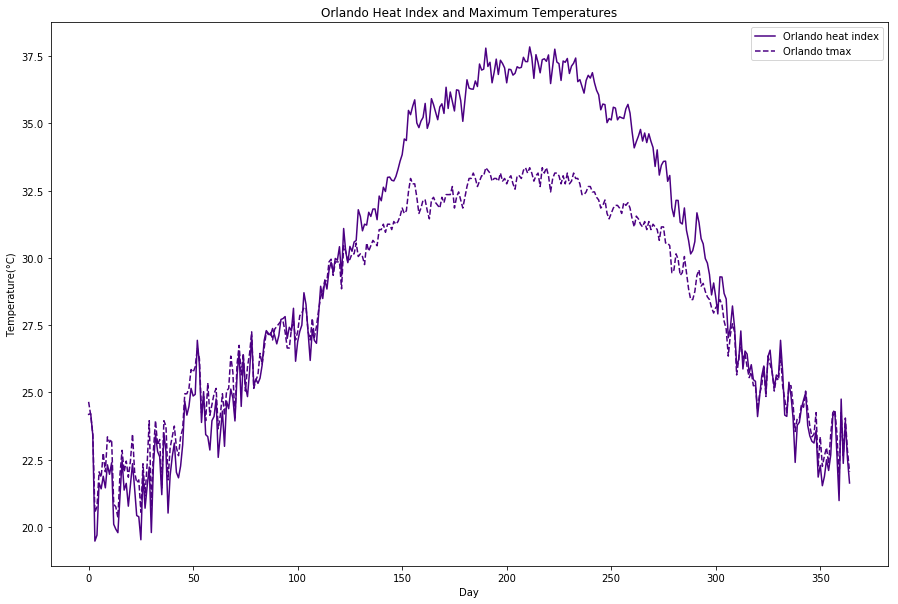

In [142]:
plt.figure(figsize=(15,10))

plt.plot(THI_tmax_orl_median, color= 'indigo', label= 'Orlando heat index')
plt.plot(orltmax_median,'--', color= 'indigo', label= 'Orlando tmax')

plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(°C)')
plt.title('Orlando Heat Index and Maximum Temperatures')
plt.savefig('thi_tmax_orl.JPEG',format='jpeg')

## Number of days where temperature was above 33 °C

Text(0, 0.5, 'Number of Days')

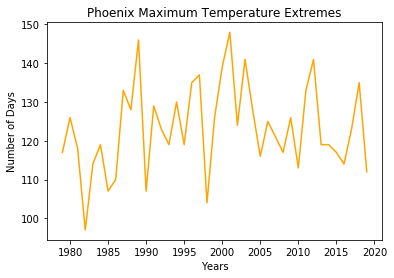

In [143]:
ph_heatdays = np.zeros((phyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_phyrs in enumerate(phyrs):
     
    # Pull out current year temperatures
    curr_year = phtmax[i_phyrs[0],:]
    
    ph_above_thresh = sum(i>=33 for i in curr_year)
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    ph_heatdays[i_phyrs[0]] = ph_above_thresh 

plt.plot(phyrs,ph_heatdays, color='orange')
plt.title('Phoenix Maximum Temperature Extremes') #extreme caution zone?
plt.xlabel('Years')
plt.ylabel('Number of Days')

Text(0, 0.5, 'Number of Days')

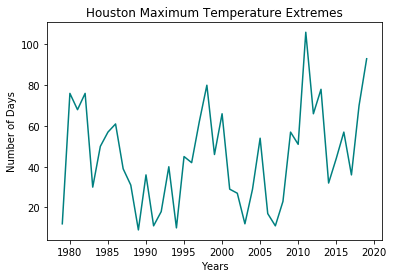

In [144]:
hou_heatdays = np.zeros((houyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_houyrs in enumerate(houyrs):
     
    # Pull out current year temperatures
    curr_year = houtmax[i_houyrs[0],:]
    
    hou_above_thresh = sum(i>=33 for i in curr_year)
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    hou_heatdays[i_houyrs[0]] = hou_above_thresh 

plt.plot(houyrs,hou_heatdays, color='teal')
plt.title('Houston Maximum Temperature Extremes') #extreme caution zone?
plt.xlabel('Years')
plt.ylabel('Number of Days')

Text(0, 0.5, 'Number of Days')

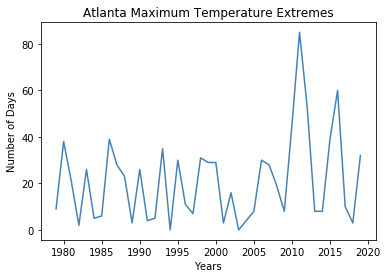

In [145]:
atl_heatdays = np.zeros((atlyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_atlyrs in enumerate(atlyrs):
     
    # Pull out current year temperatures
    curr_year = atltmax[i_atlyrs[0],:]
    
    atl_above_thresh = sum(i>=33 for i in curr_year)
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    atl_heatdays[i_atlyrs[0]] = atl_above_thresh 

plt.plot(atlyrs,atl_heatdays, color='steelblue')
plt.title('Atlanta Maximum Temperature Extremes')
plt.xlabel('Years')
plt.ylabel('Number of Days')

Text(0, 0.5, 'Number of Days')

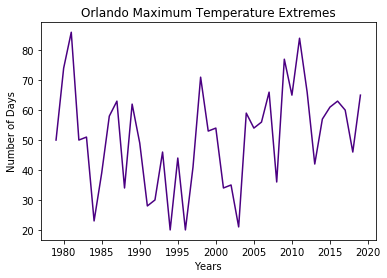

In [146]:
orl_heatdays = np.zeros((orlyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_orlyrs in enumerate(orlyrs):
     
    # Pull out current year temperatures
    curr_year = orltmax[i_orlyrs[0],:]
    
    orl_above_thresh = sum(i>=33 for i in curr_year)
    
    
    # Store value
    orl_heatdays[i_orlyrs[0]] = orl_above_thresh 

plt.plot(orlyrs,orl_heatdays, color='indigo')
plt.title('Orlando Maximum Temperature Extremes')
plt.xlabel('Years')
plt.ylabel('Number of Days')

In [148]:
orl_heatdays_THI = np.zeros((orlyrs))
    
for i_orlyrs in enumerate(orlyrs):
     
    # Pull out current year temperatures
    curr_year = orltmax[i_orlyrs[0],:]
    
    orl_above_thresh = sum(i>=33 for i in curr_year)
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    orl_heatdays_THI[i_orlyrs[0]] = orl_above_thresh
    
    
plt.figure(figsize=(15,10))
plt.plot(orlyrs,orl_heatdays, color= 'indigo')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Days at or above 33°C')
plt.title('Orlando Heat Index and Maximum Temperatures')

ValueError: sequence too large; cannot be greater than 32

## Number of days where heat index was above 33 degrees.

In [86]:
phtmax

array([[ 9.45, 10.75, 15.35, ..., 15.65, 16.55,   nan],
       [19.55, 18.65, 17.45, ..., 27.45, 23.95, 21.35],
       [21.65, 21.85, 23.55, ..., 17.55, 16.75,   nan],
       ...,
       [13.05,  9.65, 13.05, ..., 24.95, 21.55,   nan],
       [23.35, 24.15, 23.65, ..., 12.45,  6.35,   nan],
       [ 7.65,  9.55, 12.75, ..., 12.55, 15.95,   nan]])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


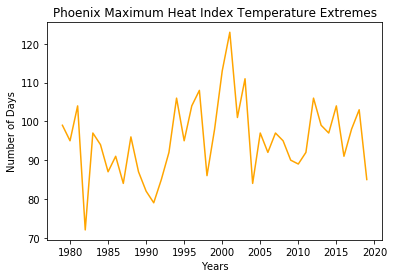

In [87]:
ph_heatdays_THI = np.zeros((phyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_phyrs in enumerate(phyrs):
     
    # Pull out current year temperatures
    curr_year_THI_ph = THI_tmax_ph[i_phyrs[0],:]
    
    ph_above_thresh_THI = sum(i>=33 for i in curr_year_THI_ph)
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    ph_heatdays_THI[i_phyrs[0]] = ph_above_thresh_THI 

plt.plot(phyrs,ph_heatdays_THI, color='orange')
plt.title('Phoenix Maximum Heat Index Temperature Extremes') #extreme caution zone?
plt.xlabel('Years')
plt.ylabel('Number of Days')

print(ph_heatdays)

Text(0, 0.5, 'Number of Days')

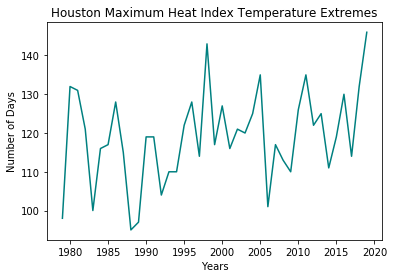

In [88]:
hou_heatdays_THI = np.zeros((houyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_houyrs in enumerate(houyrs):
     
    # Pull out current year temperatures
    curr_year_THI_hou = THI_tmax_hou[i_houyrs[0],:]
    
    hou_above_thresh_THI = sum(i>=33 for i in curr_year_THI_hou)
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    hou_heatdays_THI[i_houyrs[0]] = hou_above_thresh_THI

plt.plot(phyrs,hou_heatdays_THI, color='teal')
plt.title('Houston Maximum Heat Index Temperature Extremes') #extreme caution zone?
plt.xlabel('Years')
plt.ylabel('Number of Days')

Text(0, 0.5, 'Number of Days')

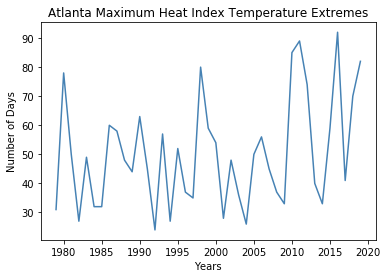

In [89]:
atl_heatdays_THI = np.zeros((atlyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_atlyrs in enumerate(atlyrs):
     
    # Pull out current year temperatures
    curr_year_THI_atl = THI_tmax_atl[i_atlyrs[0],:]
    
    atl_above_thresh_THI = sum(i>=33 for i in curr_year_THI_atl)
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    atl_heatdays_THI[i_atlyrs[0]] = atl_above_thresh_THI

plt.plot(phyrs,atl_heatdays_THI, color='steelblue')
plt.title('Atlanta Maximum Heat Index Temperature Extremes') #extreme caution zone?
plt.xlabel('Years')
plt.ylabel('Number of Days')

Text(0, 0.5, 'Number of Days')

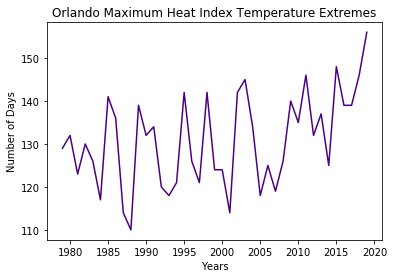

In [90]:
orl_heatdays_THI = np.zeros((orlyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_orlyrs in enumerate(orlyrs):
     
    # Pull out current year temperatures
    curr_year_THI_orl = THI_tmax_orl[i_orlyrs[0],:]
    
    orl_above_thresh_THI = sum(i>=33 for i in curr_year_THI_orl)
    
    
    #days above the curr year threshold in curr year
    #plt.plot(curr_year)
    
    # Store value
    orl_heatdays_THI[i_orlyrs[0]] = orl_above_thresh_THI

plt.plot(orlyrs,orl_heatdays_THI, color='indigo')
plt.title('Orlando Maximum Heat Index Temperature Extremes') #extreme caution zone?
plt.xlabel('Years')
plt.ylabel('Number of Days')

### Heat Index Temps Above 33°C 

Text(0, 0.5, 'Number of Days')

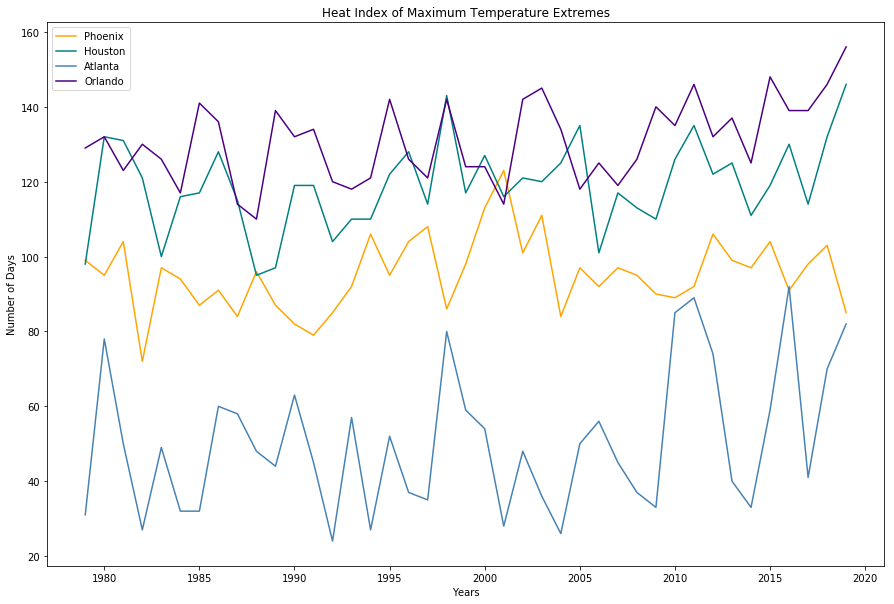

In [91]:
plt.figure(figsize=(15,10))
plt.plot(phyrs,ph_heatdays_THI, color='orange', label='Phoenix')
plt.plot(phyrs,hou_heatdays_THI, color='teal', label='Houston')
plt.plot(phyrs,atl_heatdays_THI, color='steelblue', label='Atlanta')
plt.plot(orlyrs,orl_heatdays_THI, color='indigo', label='Orlando')

plt.legend()
plt.title('Heat Index of Maximum Temperature Extremes')
plt.xlabel('Years')
plt.ylabel('Number of Days')

## Rhum and tmax temperatures plotted against each other

Text(0.5, 1.0, 'Median Daily Maximum Temperatures')

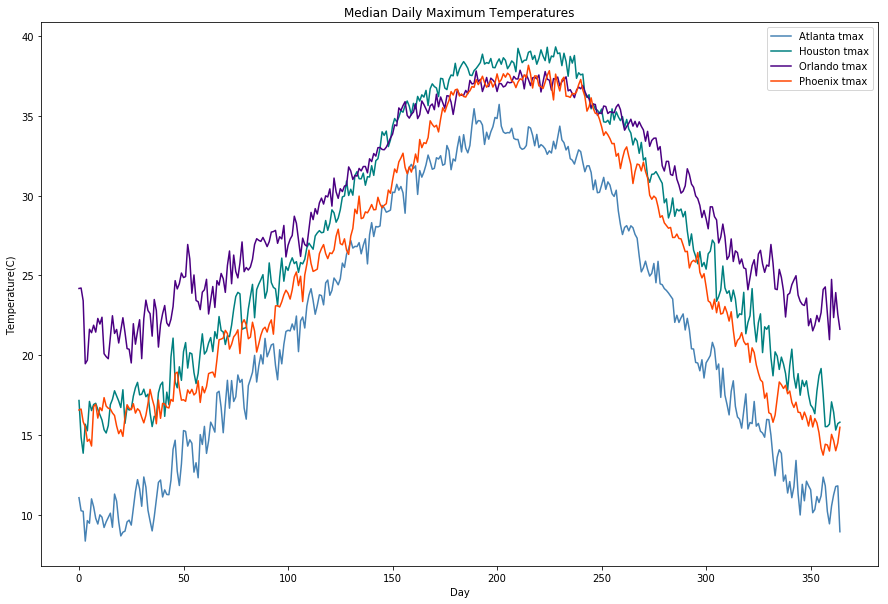

In [92]:
plt.figure(figsize=(15,10))
plt.plot(THI_tmax_atl_median, color= 'steelblue', label= 'Atlanta tmax')
plt.plot((THI_tmax_hou_median), label= 'Houston tmax', color='teal')
plt.plot((THI_tmax_orl_median), color= 'indigo', label= 'Orlando tmax')
plt.plot(THI_tmax_ph_median, color= 'orangered', label= 'Phoenix tmax')

plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Median Daily Maximum Temperatures')

In [93]:
#for i_phyrs[0] in enumerate(phyrs):
    
    #loc_phyrs = i_phyrs[0] #do for every yr starting from 1st yr
    
    #pull out temp data for the current yr
    phtmax_phyrs_HI = phtmax[loc_phyrs,:]
    
    
    #calc heat index
    phtmax_HI = heatindex()
    
    #store the current yr estimate in our full array
    heatindexstorage[loc_phyrs] = phtmax_HI
    
    
#atlmax_median

IndentationError: unexpected indent (<ipython-input-93-9b5acc2e5204>, line 6)

In [94]:
phtmax_mean_allyrs = np.zeros((phyrs.size)) #storage variable of zeros the size of yrs

for i_phyrs in enumerate(phyrs):
    
    #location of all data
    loc_phyrs = i_phyrs[0] #do it for every yr starting at the 1st
    
    #pull out temp data for the current yr
    phtmax_phyrs = phtmax[loc_phyrs,:]
    
    #calc the mean
    phtmax_mean = np.nanmean(phtmax_phyrs)
    
    #store the current yr estimate in our full array
    phtmax_mean_allyrs[loc_phyrs] = phtmax_mean
    
    
print(phtmax)

[[ 9.45 10.75 15.35 ... 15.65 16.55   nan]
 [19.55 18.65 17.45 ... 27.45 23.95 21.35]
 [21.65 21.85 23.55 ... 17.55 16.75   nan]
 ...
 [13.05  9.65 13.05 ... 24.95 21.55   nan]
 [23.35 24.15 23.65 ... 12.45  6.35   nan]
 [ 7.65  9.55 12.75 ... 12.55 15.95   nan]]


# Timing of first, last day above 33°C, heat exposure season

## Using tmax temperatures

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in greater_equal


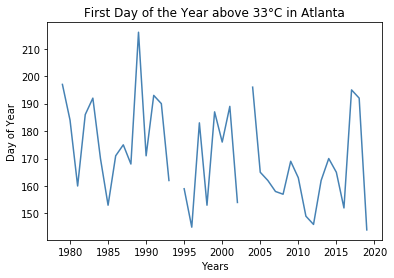

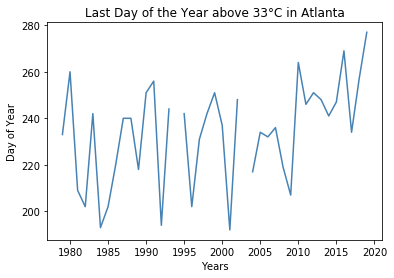

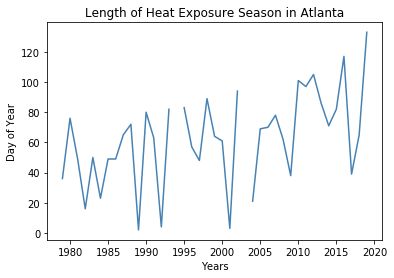

In [95]:
atl_heatdays1st = np.zeros((atlyrs.size))
atl_heatdays2nd = np.zeros((atlyrs.size))

#91/32.7, 103/39.4, 126/52.2

#finding last day would be max
#atl

# for each term in atlyrs


#for i_atlyrs in enumerate(atlyrs):

    #curr_year = atltmax[i_atlyrs[0],:].copy()
    
    #loc_days_atl = np.where(curr_year>=33)
    
    #first_day_atl = np.min(atldoy[loc_days_atl])
    
    # Setup a boolean in case there are no days above 33 C
    #if atldoy[loc_days_atl].size==0:
        #first_day_atl = np.nan
    #else:
        #first_day_atl = np.min(atldoy[loc_days_atl])+1
    
    #atl_heatdays1st[i_yr[0]] = first_day_atl
    #first_day_atl.copy = atl_heatdays1st
    
#plt.scatter(atlyrs, atl_heatdays1st, color='darkred')
#plt.plot(atlyrs, atl_heatdays1st, color='coral')

#print(atltmax.shape, 'Sliced: ', atltmax[i_atlyrs[0],:].shape)

#print(atldoy[loc_days_atl], first_day_atl)


# Setup an array to store all the calculations
day1_t33_atl = np.zeros((houyrs.size))   # The first day of the year with Tmax>33
day2_t33_atl = np.zeros((houyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop
for i_yr in enumerate(orlyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_atl = atltmax[i_yr[0],:].copy()
    # Find location of ALL days with TMAX>=33
    loc_days_atl = np.where(curr_yr_atl>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_atl)==0:
        t33_d1_atl = np.nan
        t33_d2_atl = np.nan
    else:
        t33_d1_atl = np.min(loc_days_atl)+1        
        t33_d2_atl = np.max(loc_days_atl)+1        
    # Put it in the storage array
    day1_t33_atl[i_yr[0]] = t33_d1_atl
    day2_t33_atl[i_yr[0]] = t33_d2_atl #took away .copy()

heatexp_atl=day2_t33_atl-day1_t33_atl #heat exposure periodt

plt.figure()
plt.plot(houyrs,day1_t33_atl, color='steelblue')
plt.title('First Day of the Year above 33°C in Atlanta')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_first_atl.JPEG',format='jpeg')

plt.figure()
plt.plot(houyrs,day2_t33_atl, color='steelblue')
plt.title('Last Day of the Year above 33°C in Atlanta')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_last_atl.JPEG',format='jpeg')

plt.figure()
plt.plot(houyrs,heatexp_atl, color='steelblue')
plt.title('Length of Heat Exposure Season in Atlanta')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_heatseason_atl.JPEG',format='jpeg')

109.0


/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in greater_equal


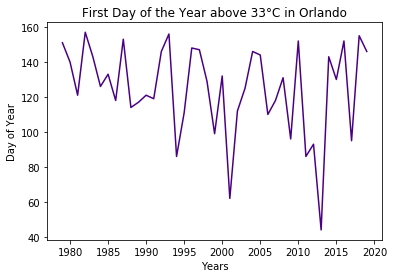

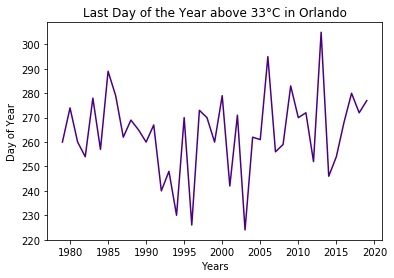

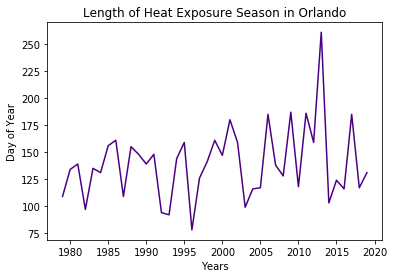

In [96]:
ph_heatdays = np.zeros((atlyrs.size))


#finding last day would be max
#subtract max and min to find difference between the days
#atl


ph_firstday_abovethresh = np.zeros((atlyrs.size))

# for each term in atlyrs


for i_phyrs in enumerate(phyrs):

    curr_year = phtmax[i_phyrs[0],:]
    
    loc_days_ph = np.where(curr_year>=33)
    
    #if phdoy[loc_days_ph].size==0:
    if np.size(loc_days_ph)==0:
        first_day_ph = np.nan
    else:
        first_day_ph = np.min(phdoy[loc_days_ph])
    
    ph_firstday_abovethresh[i_yr[0]] = first_day_ph
    
print(ph_firstday_abovethresh[i_yr[0]])
#plt.scatter(phyrs, ph_firstday_abovethresh, color='coral')
#plt.plot(phyrs, ph_firstday_abovethresh, color='orange')

#print(loc_days_ph)
#plt.plot(phyrs,ph_heatdays_THI, color='orange', label='Phoenix')
#plt.plot(phyrs,hou_heatdays_THI, color='teal', label='Houston')
#plt.plot(phyrs,atl_heatdays_THI, color='steelblue', label='Atlanta')
#plt.plot(orlyrs,orl_heatdays_THI, color='indigo', label='Orlando')

# Setup an array to store all the calculations
day1_t33_orl = np.zeros((houyrs.size))   # The first day of the year with Tmax>33
day2_t33_orl = np.zeros((houyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop
for i_yr in enumerate(orlyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_orl = orltmax[i_yr[0],:].copy()
    # Find location of ALL days with TMAX>=33
    loc_days_orl = np.where(curr_yr_orl>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_orl)==0:
        t33_d1 = np.nan
        t33_d2 = np.nan
    else:
        t33_d1 = np.min(loc_days_orl)+1        
        t33_d2 = np.max(loc_days_orl)+1        
    # Put it in the storage array
    day1_t33_orl[i_yr[0]] = t33_d1.copy()
    day2_t33_orl[i_yr[0]] = t33_d2.copy()

plt.figure()
plt.plot(houyrs,day1_t33_orl, color='indigo')
plt.title('First Day of the Year above 33°C in Orlando')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_first_orl.JPEG',format='jpeg')

plt.figure()
plt.plot(houyrs,day2_t33_orl, color='indigo')
plt.title('Last Day of the Year above 33°C in Orlando')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_last_orl.JPEG',format='jpeg')

plt.figure()
plt.plot(houyrs,day2_t33_orl-day1_t33_orl, color='indigo')
plt.title('Length of Heat Exposure Season in Orlando')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_heatseason_orl.JPEG',format='jpeg')

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal


(366,)


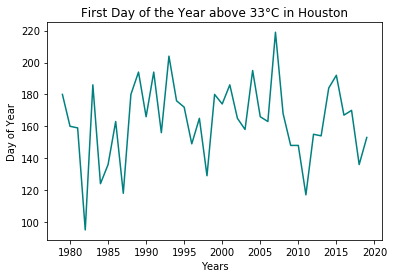

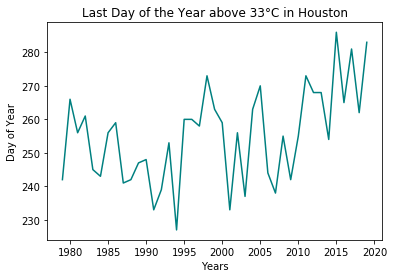

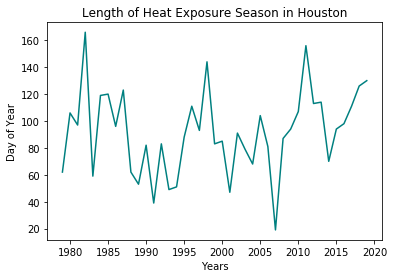

In [97]:
hou_heatdays = np.zeros((atlyrs.size))


#finding last day would be max
#subtract max and min to find difference between the days
#atl


hou_firstday_abovethresh = np.zeros((houyrs.size))

# for each term in atlyrs


#for i_houyrs in enumerate(houyrs):

    #curr_year = houtmax[i_houyrs[0],:]
    
    #loc_days_hou = np.where(curr_year>=33)
    
    #if houdoy[loc_days_hou].size==0:
        #first_day_hou = np.nan
    #else:
        #first_day_hou = np.min(houdoy[loc_days_hou])
    
    #hou_firstday_abovethresh[i_yr[0]] = first_day_hou
    
#plt.scatter(houyrs, hou_firstday_abovethresh, color='teal')
#plt.plot(houyrs, hou_firstday_abovethresh, color='turquoise')


# Setup an array to store all the calculations
day1_t33_hou = np.zeros((houyrs.size))   # The first day of the year with Tmax>33
day2_t33_hou = np.zeros((houyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop
for i_yr in enumerate(houyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_hou = houtmax[i_yr[0],:].copy()
    # Find location of ALL days with TMAX>=33
    loc_days_hou = np.where(curr_yr_hou>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_hou)==0:
        t33_d1 = np.nan
        t33_d2 = np.nan
    else:
        t33_d1 = np.min(loc_days_hou)+1        
        t33_d2 = np.max(loc_days_hou)+1        
    # Put it in the storage array
    day1_t33_hou[i_yr[0]] = t33_d1.copy()
    day2_t33_hou[i_yr[0]] = t33_d2.copy()


timingline = 
    
plt.figure()
plt.title('First Day of the Year above 33°C in Houston')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.plot(houyrs,day1_t33_hou, color='teal')
plt.savefig('timing_first_hou.JPEG',format='jpeg')

plt.figure()
plt.title('Last Day of the Year above 33°C in Houston')
plt.plot(houyrs,day2_t33_hou, color='teal')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_last_hou.JPEG',format='jpeg')

plt.figure()
plt.title('Length of Heat Exposure Season in Houston')
plt.plot(houyrs,day2_t33_hou-day1_t33_hou, color='teal')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_heatseason_orl.JPEG',format='jpeg')

print(curr_yr_hou.shape)

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in greater_equal


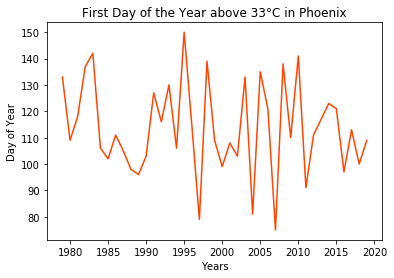

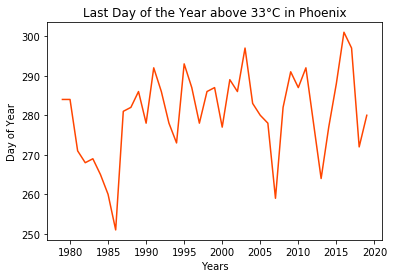

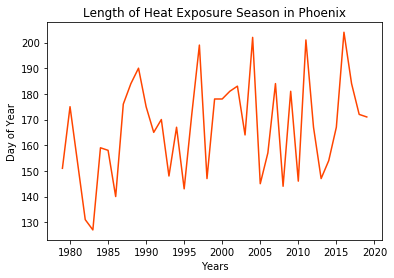

In [98]:
orl_heatdays = np.zeros((atlyrs.size))


#finding last day would be max
#subtract max and min to find difference between the days
#atl


orl_firstday_abovethresh = np.zeros((houyrs.size))

# for each term in atlyrs


#for i_orlyrs in enumerate(orlyrs):

    #curr_year = orltmax[i_orlyrs[0],:]
    
    #loc_days_orl = np.where(curr_year>=33)
    
    #if orldoy[loc_days_orl].size==0:
        #first_day_orl = np.nan
    #else:
        #first_day_orl = np.min(orldoy[loc_days_orl])
    
    #orl_firstday_abovethresh[i_yr[0]] = first_day_orl
    
#plt.scatter(orlyrs, orl_firstday_abovethresh, color='indigo')
#plt.plot(houyrs, orl_firstday_abovethresh, color='mediumslateblue')


# Setup an array to store all the calculations
day1_t33_ph = np.zeros((houyrs.size))   # The first day of the year with Tmax>33
day2_t33_ph = np.zeros((houyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop
for i_yr in enumerate(phyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_ph = phtmax[i_yr[0],:].copy()
    # Find location of ALL days with TMAX>=33
    loc_days_ph = np.where(curr_yr_ph>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_ph)==0:
        t33_d1_ph = np.nan
        t33_d2_ph = np.nan
    else:
        t33_d1_ph = np.min(loc_days_ph)+1        
        t33_d2_ph = np.max(loc_days_ph)+1        
    # Put it in the storage array
    day1_t33_ph[i_yr[0]] = t33_d1_ph.copy()
    day2_t33_ph[i_yr[0]] = t33_d2_ph.copy()
    
heatexp_ph = day2_t33_ph-day1_t33_ph

regstat_timing = stats.linregress(houyrs,day2_t33_ph-day1_t33_ph)
#timing_line = (regstat_timing.slope*np.mean(houtmax)+regstat_timing.intercept
plt.figure()
plt.plot(houyrs,day1_t33_ph, color='orangered')
plt.title('First Day of the Year above 33°C in Phoenix')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_first_ph.JPEG',format='jpeg')
#plt.savefig('.JPEG',format='jpeg')  
              
plt.figure()
plt.plot(houyrs,day2_t33_ph, color='orangered')
plt.title('Last Day of the Year above 33°C in Phoenix')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_last_ph.JPEG',format='jpeg')

plt.figure()
plt.plot(phyrs,heatexp_ph, color='orangered')
plt.title('Length of Heat Exposure Season in Phoenix')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_heatseason_ph.JPEG',format='jpeg')

#print(day1_t33_ph.shape, day2_t33_ph.shape, day1_t33_ph, day2_t33_ph)

## Using heat indicies

In [203]:
THI_tmax_atl = heatindex(atltmax,atlrhum)


#print(atltmax.shape, atlrhum.shape)

THI_tmax_orl = heatindex(orltmax, orlrhum)
#print(THI_tmax_orl)

THI_tmax_hou = heatindex(houtmax, hourhum)
#print(THI_tmax_hou)

THI_tmax_ph = heatindex(phtmax, phrhum)

print(day1_t33_atl.shape)

#phtmax[i_yr[0],:].shape

(41,)


In [204]:
THI_tmax_atl.shape

(41, 366)

(array([141, 142, 143, 144, 145, 146, 147, 148, 149, 166, 167, 171, 172,
       173, 174, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 211, 212,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 244, 245, 246, 247, 248, 249, 250,
       251, 252, 253, 254, 255, 257, 258, 259, 268, 269, 270, 271, 272,
       273, 274, 275, 276]),) 141 142.0 142


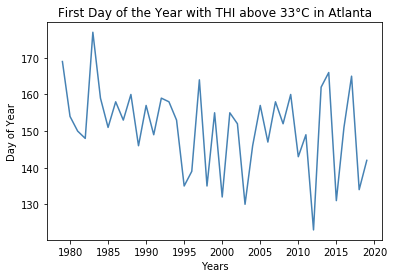

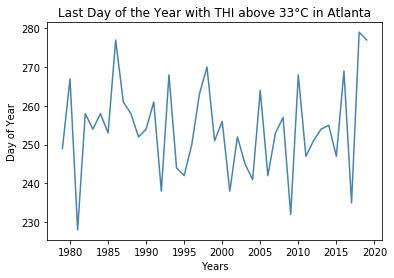

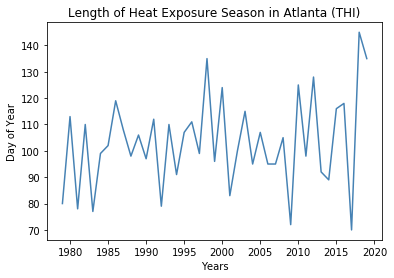

In [215]:
#make curr year thi not tmax temps

# Setup an array to store all the calculations
day1_t33_atl = np.zeros((houyrs.size))   # The first day of the year with Tmax>33
day2_t33_atl = np.zeros((houyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop


for i_yr in enumerate(atlyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_atl = THI_tmax_atl[i_yr[0],:]
    # Find location of ALL days with TMAX>=33
    loc_days_atl = np.where(curr_yr_atl>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_atl)==0:
        t33_d1_atl = np.nan
        t33_d2_atl = np.nan
    else:
        t33_d1_atl = np.min(loc_days_atl)+1        
        t33_d2_atl = np.max(loc_days_atl)+1        
    # Put it in the storage array
    day1_t33_atl[i_yr[0]] = t33_d1_atl
    day2_t33_atl[i_yr[0]] = t33_d2_atl

heatexp_atl=day2_t33_atl-day1_t33_atl #heat exposure period

plt.figure()
plt.plot(houyrs,day1_t33_atl, color='steelblue')
plt.title('First Day of the Year with THI above 33°C in Atlanta')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_firstTHI_atl.JPEG',format='jpeg')

plt.figure()
plt.plot(houyrs,day2_t33_atl, color='steelblue')
plt.title('Last Day of the Year with THI above 33°C in Atlanta')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_lastTHI_atl.JPEG',format='jpeg')

plt.figure()
plt.plot(houyrs,heatexp_atl, color='steelblue')
plt.title('Length of Heat Exposure Season in Atlanta (THI)') #Heat index as title
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_heatseasonTHI_atl.JPEG',format='jpeg')

print(loc_days_atl,np.min(loc_days_atl),day1_t33_atl[i_yr[0]], t33_d1_atl)


In [101]:
print(loc_days_atl)
print(THI_tmax_atl.shape)

(array([176, 181, 184, 185, 187, 188, 189, 190, 191, 192, 193, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 214, 215, 216, 217, 218, 221, 222, 223, 227, 228, 229, 230,
       231, 232, 234, 240]),)
(366,)


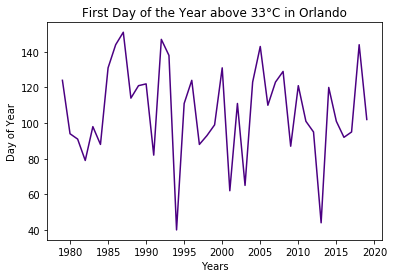

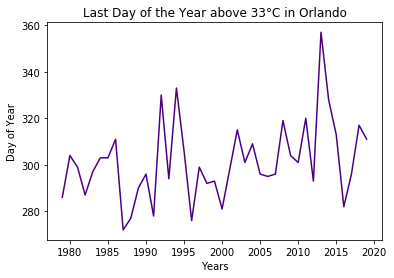

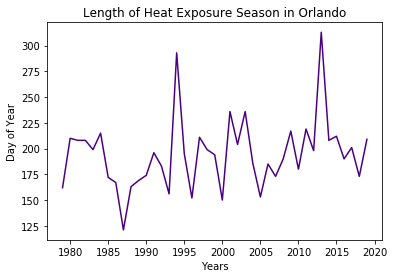

In [222]:

# Setup an array to store all the calculations
day1_t33_orl = np.zeros((orlyrs.size))   # The first day of the year with Tmax>33
day2_t33_orl = np.zeros((orlyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop


for i_yr in enumerate(orlyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_orl = THI_tmax_orl[i_yr[0],:]
    # Find location of ALL days with TMAX>=33
    loc_days_orl = np.where(curr_yr_orl>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_orl)==0:
        t33_d1_orl = np.nan
        t33_d2_orl = np.nan
    else:
        t33_d1_orl = np.min(loc_days_orl)+1        
        t33_d2_orl = np.max(loc_days_orl)+1        
    # Put it in the storage array
    day1_t33_orl[i_yr[0]] = t33_d1_orl
    day2_t33_orl[i_yr[0]] = t33_d2_orl

heatexp_orl=day2_t33_orl-day1_t33_orl #heat exposure period

plt.figure()
plt.plot(orlyrs,day1_t33_orl, color='indigo')
plt.title('First Day of the Year above 33°C in Orlando')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_firstTHI_orl.JPEG',format='jpeg')

plt.figure()
plt.plot(orlyrs,day2_t33_orl, color='indigo')
plt.title('Last Day of the Year above 33°C in Orlando')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_lastTHI_orl.JPEG',format='jpeg')

plt.figure()
plt.plot(orlyrs,heatexp_orl, color='indigo')
plt.title('Length of Heat Exposure Season in Orlando') #Heat index as title
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_heatseasonTHI_orl.JPEG',format='jpeg')

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.


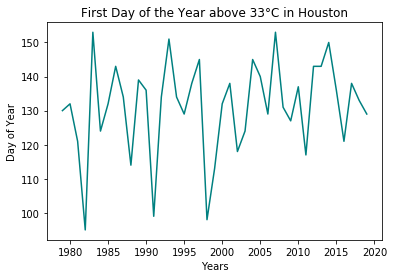

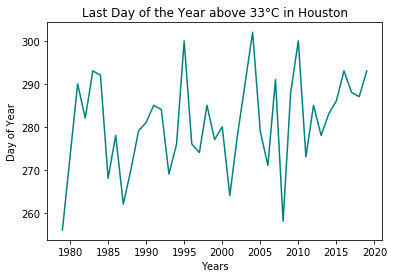

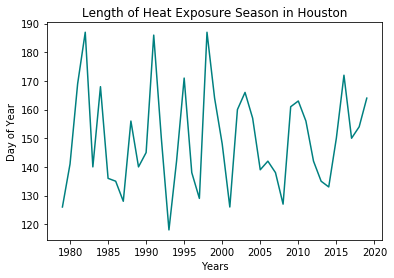

In [218]:
# Setup an array to store all the calculations
day1_t33_hou = np.zeros((houyrs.size))   # The first day of the year with Tmax>33
day2_t33_hou = np.zeros((houyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop
for i_yr in enumerate(houyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_hou = THI_tmax_hou[i_yr[0],:].copy()
    # Find location of ALL days with TMAX>=33
    loc_days_hou = np.where(curr_yr_hou>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_hou)==0:
        t33_d1 = np.nan
        t33_d2 = np.nan
    else:
        t33_d1 = np.min(loc_days_hou)+1        
        t33_d2 = np.max(loc_days_hou)+1        
    # Put it in the storage array
    day1_t33_hou[i_yr[0]] = t33_d1.copy()
    day2_t33_hou[i_yr[0]] = t33_d2.copy()

    
plt.figure()
plt.title('First Day of the Year above 33°C in Houston')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.plot(houyrs,day1_t33_hou, color='teal')
plt.savefig('timing_first_hou.JPEG',format='jpeg')

plt.figure()
plt.title('Last Day of the Year above 33°C in Houston')
plt.plot(houyrs,day2_t33_hou, color='teal')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_last_hou.JPEG',format='jpeg')

plt.figure()
plt.title('Length of Heat Exposure Season in Houston')
plt.plot(houyrs,day2_t33_hou-day1_t33_hou, color='teal')
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.savefig('timing_heatseason_orl.JPEG',format='jpeg')

In [153]:
# Calculate the cooling degree days.
# Set the threshold for a CDD
thresh_cdd=18.33
# Convert individual days into CDD
year_cdd = year_tmax-thresh_cdd
plt.figure()
plt.plot(year_cdd)

# Find the location of all the cooling degree days
i_cdd = np.where(year_cdd>=0)
# Use the locations
year_cumcdd = np.sum(year_cdd[i_cdd])
print(year_cumcdd)

NameError: name 'year_tmax' is not defined

86547.1400000002


/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less_equal
  


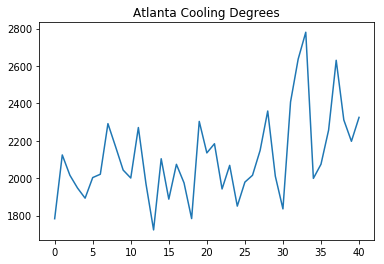

In [187]:
# Calculate the cooling degree days.
# Set the threshold for a CDD
thresh_cdd=18.33

# Convert individual days into CDD
year_cdd = atltmax-thresh_cdd
i_noncdd = np.where(year_cdd<=0)
year_cdd[i_noncdd]=0

sumcdd_atl = np.nansum(year_cdd, axis=1)

plt.figure()
plt.title('Atlanta Cooling Degrees')
plt.plot(sumcdd_atl)


# Find the location of all the cooling degree days

# Use the locations
year_cumcdd = np.sum(year_cdd[i_noncdd])
print(np.sum(sumcdd_atl))


/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


137920.9000000001


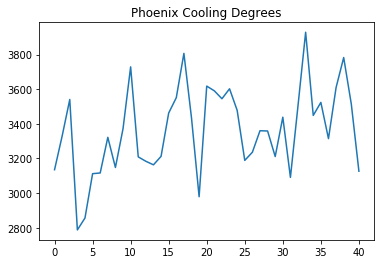

In [206]:
# Convert individual days into CDD
year_cdd_ph = phtmax-thresh_cdd
i_noncdd_ph = np.where(year_cdd<=0)
year_cdd[i_noncdd]=0

sumcdd_ph = np.nansum(year_cdd_ph, axis=1)

plt.figure()
plt.title('Phoenix Cooling Degrees')
plt.plot(sumcdd_ph)

#regstat_cdd_ph= stats.linregress (phdoy,sumcdd_ph)
#fit_line_ph = (regstat_cdd_ph.slope*sumdd_ph)+regstat_heatdays.intercept

# Find the location of all the cooling degree days

# Use the locations
year_cumcdd = np.sum(year_cdd_ph[i_noncdd_ph])
print(np.sum(sumcdd_ph))

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


144885.5000000001


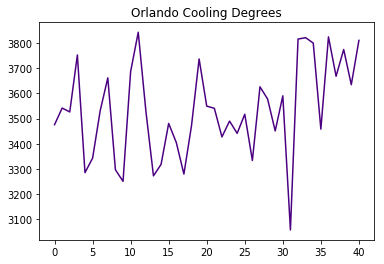

In [210]:
# Convert individual days into CDD
year_cdd_orl = orltmax-thresh_cdd
i_noncdd_orl = np.where(year_cdd<=0)
year_cdd[i_noncdd]=0

sumcdd_orl = np.nansum(year_cdd_orl, axis=1)

plt.figure()
plt.title('Orlando Cooling Degrees')
plt.plot(sumcdd_orl, color = 'indigo')


# Find the location of all the cooling degree days

# Use the locations
year_cumcdd = np.sum(year_cdd_orl[i_noncdd_orl])
print(np.sum(sumcdd_orl))

109138.40000000018


/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


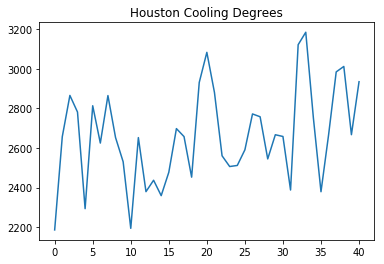

In [191]:
# Convert individual days into CDD
year_cdd_hou = houtmax-thresh_cdd
i_noncdd_hou = np.where(year_cdd<=0)
year_cdd[i_noncdd]=0

sumcdd_hou = np.nansum(year_cdd_hou, axis=1)

plt.figure()
plt.title('Houston Cooling Degrees')
plt.plot(sumcdd_hou)


# Find the location of all the cooling degree days

# Use the locations
year_cumcdd = np.sum(year_cdd_hou[i_noncdd_hou])
print(np.sum(sumcdd_hou))